In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
img = plt.imread("/content/drive/MyDrive/my_images_for_classification/2/download (1).jpg")

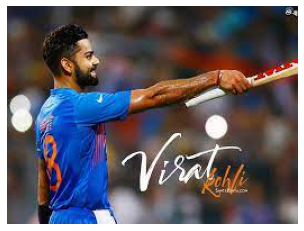

In [3]:
plt.imshow(img)
plt.axis('off');

In [4]:
width, height, dim = img.shape

In [7]:
image_array = img.reshape(width*height,dim)

## Normalizing the image array
image_array = image_array/255

In [9]:
from sklearn.utils import shuffle

## Building the model on a small part of the image 
sample_array = shuffle(image_array)[:1000]

In [10]:
sample_array.size, sample_array.shape

(3000, (1000, 3))

In [11]:
np.random.seed(9)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(sample_array)

KMeans(n_clusters=5)

In [13]:
labels = kmeans.predict(image_array)
labels

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [15]:
cluster_center = kmeans.cluster_centers_

In [16]:
cluster_center

array([[0.84685598, 0.86098715, 0.86166329],
       [0.58120352, 0.47880325, 0.43258959],
       [0.07140361, 0.32090856, 0.70743545],
       [0.19854641, 0.15618301, 0.14786928],
       [0.34656583, 0.28328291, 0.26847059]])

In [17]:
## Recreating the image 
def Recreating(cluster_center,labels, height, width, dim):
  '''
  It recreates the image 
  '''
  img = np.zeros((width,height,dim))
  index = 0
  for i in range(width):
    for j in range(height):
      img[i][j] = cluster_center[labels[index]]
      index = index + 1

  return img    
 

(-0.5, 258.5, 193.5, -0.5)

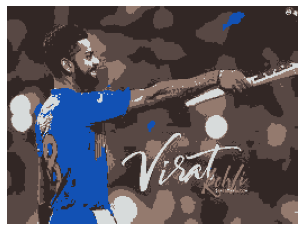

In [18]:
plt.imshow(Recreating(cluster_center,labels, height, width, dim))
plt.axis('off');